In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Explanation:
# Dataset: This code uses the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 classes (e.g., airplane, car, bird, etc.).
# CNN Architecture: The architecture has two convolutional layers each followed by max-pooling, and three fully connected layers for classification into 10 classes.
# Training: The model is trained for 10 epochs using the Adam optimizer and cross-entropy loss.
# Testing: The accuracy is measured on the test set of 10,000 images.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
#trainloader: This is a PyTorch DataLoader object, which is used to load data in batches for training or evaluation.
#It typically contains a dataset and information about batch size, shuffling, and other parameters.



Files already downloaded and verified


In [7]:
# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self): #constructor method 
        super(CNN, self).__init__() #This line calls the __init__ method of the parent class of CNN which is necessary to properly initialize the internal components of PyTorch modules
        # First convolutional layer
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        print('Constructor called')

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Conv layer 1 + ReLU + Pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Conv layer 2 + ReLU + Pooling
        x = x.view(-1, 64 * 8 * 8)  # Flattening
        x = torch.relu(self.fc1(x))  # Fully connected layer 1 + ReLU
        x = torch.relu(self.fc2(x))  # Fully connected layer 2 + ReLU
        x = self.fc3(x)  # Output layer (10 classes)
        return x
print('Class CNN Defined')

Class CNN Defined


In [8]:
# Create the CNN model
net = CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the model
n_epochs = 1
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): 
        #enumerate(): This built-in Python function adds a counter to an iterable. 
        #It returns a tuple containing the index (starting from 0) and the value from the iterable.
        inputs, labels = data
        optimizer.zero_grad() # initialize gradients to zero

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward() # compute gradients
        optimizer.step() # update weights 

        running_loss += loss.item()
        if i % 100 == 99:    # Print loss every 100 mini-batches
            print(f'Epoch [{epoch + 1}], Batch [{i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


Constructor called
Epoch [1], Batch [100] loss: 1.884
Epoch [1], Batch [200] loss: 1.500
Epoch [1], Batch [300] loss: 1.376
Epoch [1], Batch [400] loss: 1.278
Epoch [1], Batch [500] loss: 1.215
Finished Training


In [9]:
# Test the model
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

correct = 0
total = 0
#with torch.no_grad():
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total:.2f}%')



Files already downloaded and verified
Accuracy of the network on the 10,000 test images: 56.93%


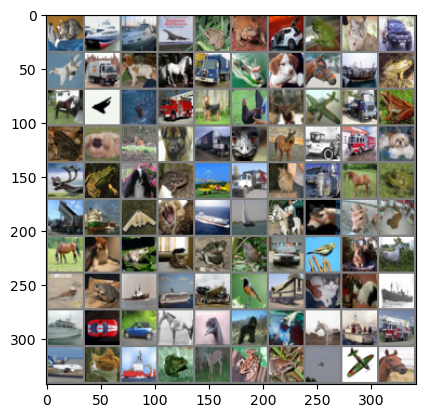

plane car   cat   cat   car   car   car   car   plane car  
cat   car   plane frog  car   ship  frog  plane cat   car  
frog  cat   ship  car   frog  ship  frog  ship  car   car  
car   ship  ship  plane car   plane frog  car   car   frog 
cat   car   frog  car   cat   car   frog  plane frog  frog 
car   cat   car   plane cat   cat   frog  plane frog  plane
frog  plane car   ship  car   ship  car   cat   plane frog 
ship  car   cat   cat   car   ship  car   plane plane cat  
cat   car   car   frog  ship  frog  ship  cat   cat   car  
cat   frog  cat   car   frog  car   car   cat   ship  frog 



In [13]:
# Plot a few test images with predicted labels
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images and their predicted labels
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Helper function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Unnormalize the images for displaying
#images = images / 2 + 0.5
imshow(torchvision.utils.make_grid(images, nrow=10))

#print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(100)))
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
num_classes_per_row = 10
num_rows = len(predicted) // num_classes_per_row + 1
for i in range(num_rows):
    start_idx = i * num_classes_per_row
    end_idx = min(start_idx + num_classes_per_row, len(predicted))
    row_classes = predicted[start_idx:end_idx]
    row_str = ' '.join(f'{classes[predicted[j]]:5s}' for j in row_classes)
    print(row_str)
